#3.1 数据质量分析

In [1]:
%matplotlib inline

数据质量分析的主要任务是检查原始数据中是否存在脏数据，脏数据一般是指不符合要求，以及不能直接进行相应分析的数据。在常见的数据挖掘工作中，脏数据包括如下内容：  
<ul><li>缺失值
<li>异常值
<li>不一致的值
<li>重复数据及含有特殊符号（如#、￥、*）的数据。</ul>

##3.1.1 缺失值分析

##3.1.2 异常值分析

异常值也称离群点，异常值分析也称为离群点分析。  
<ul><li>（1）简单统计量分析
<li>（2）$3\sigma$原则
<li>（3）箱型图分析</ul>

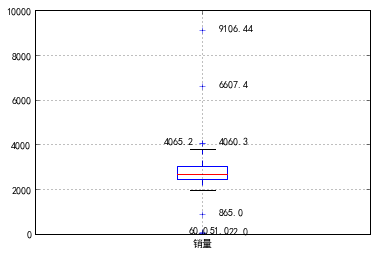

In [6]:
import pandas as pd

catering_sale = 'E:/python/data/catering_sale.xls' #餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列

import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure() #建立图像
p = data.boxplot() #画箱线图，直接使用DataFrame的方法
x = p['fliers'][0].get_xdata() # 'flies'即为异常值的标签
y = p['fliers'][0].get_ydata()
y.sort() #从小到大排序，该方法直接改变原对象

#用annotate添加注释
#其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制。
#以下参数都是经过调试的，需要具体问题具体调试。
for i in range(len(x)): 
  if i>0:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.05 -0.8/(y[i]-y[i-1]),y[i]))
  else:
    plt.annotate(y[i], xy = (x[i],y[i]), xytext=(x[i]+0.08,y[i]))

plt.show() #展示箱线图

In [3]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


##3.1.3 一致性分析

可能是由于被挖掘数据来自不同的数据源、对于重复存放的数据未能进行一致性更新造成的

#3.2 数据特征分析

##3.2.1 分布分析

分布分析能揭示数据的分布特征和分布类型。

###1.定量数据的分布分析

对于定量变量而言，选择“组数”和“组宽”是做频率分布时最主要的问题，一般步骤如下：  
<ul><li>1）求极差
<li>2）决定组距和组数
<li>3）决定分点
<li>4）列出频率分布表
<li>5）绘制频率分布直方图</ul>

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


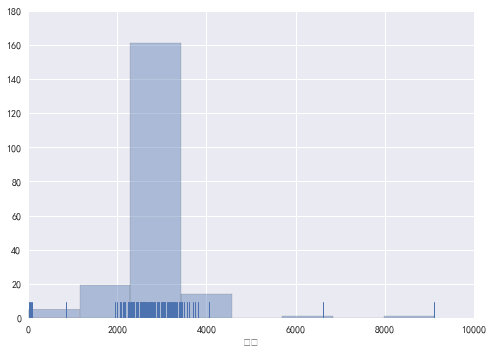

In [52]:
import seaborn as sns
sns.set(color_codes=True)

catering_sale = 'E:/python/data/catering_sale.xls' #餐饮数据
data = pd.read_excel(catering_sale) #读取数据，指定“日期”列为索引列
data[u'销量'][14] = 100
data = data.sort(u'销量')
sns.distplot(data[u'销量'], bins=8, kde=False, rug=True)

###2. 定性数据的分布分析

一般方式是饼图和条图

In [7]:
import pandas as pd
exam = 'E:/python/data/exam0203.txt'
fr = open(exam)

In [8]:
data = fr.read().split('\n')

In [9]:
data

['name    sex   age  height    weight',
 'alice     F    13    56.5      84.0',
 'becka     F    13    65.3      98.0',
 'gail      F    14    64.3      90.0',
 'karen     F    12    56.3      77.0',
 'kathy     F    12    59.8      84.5',
 'mary      F    15    66.5      112.0',
 'sandy     F    11    51.3      50.5',
 'sharon    F    15    62.5      112.5',
 'tammy     F    14    62.8      102.5',
 'alfred    M    14    69.0      112.5',
 'duke      M    14    63.5      102.5',
 'guido     M    15    67.0      133.0',
 'james     M    12    57.3      83.0',
 'jeffrey   M    13    62.5      84.0',
 'john      M    12    59.0      99.5',
 'philip    M    16    72.0      150.0',
 'robert    M    12    64.8      128.0',
 'thomas    M    11    57.5      85.0',
 'william   M    15    66.5      112.0']

##3.2.2 对比分析

对比分析主要有以下两种形式：  
<ul><li>（1）绝对数比较
<li>（2）相对数比较
<ul><li>1)结构相对数
<li>2)比例相对数
<li>3)比较相对数
<li>4)强度相对数
<li>5)计划完成程度相对数
<li>6)动态相对数</ul>

##3.2.3 统计量分析

用统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析

In [10]:
from __future__ import print_function
import pandas as pd

catering_sale = 'E:/python/data/catering_sale.xls' #餐饮数据
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列
data = data[(data[u'销量'] > 400)&(data[u'销量'] < 5000)] #过滤异常数据
statistics = data.describe() #保存基本统计量

statistics.loc['range'] = statistics.loc['max']-statistics.loc['min'] #极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%'] #四分位数间距

print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


##3.2.4 周期性分析

##3.2.5 贡献度分析

又称帕累托分析，原理是帕累托法则，又称20/80定律

In [11]:
#菜品盈利数据 帕累托图
from __future__ import print_function
import pandas as pd

#初始化参数
dish_profit = 'E:/python/data/catering_dish_profit.xls' #餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = u'菜品名')
data = data[u'盈利'].copy()
data.sort(ascending = False)

In [12]:
data

菜品名
A1     9173
A2     5729
A3     4811
A4     3594
A5     3195
A6     3026
A7     2378
A8     1970
A9     1877
A10    1782
Name: 盈利, dtype: int64

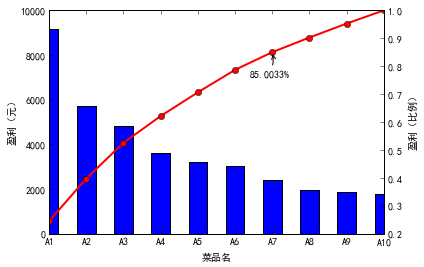

In [16]:
import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure()
data.plot(kind='bar')
plt.ylabel(u'盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2")) #添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel(u'盈利（比例）')
plt.show()

##3.2.6 相关性分析

In [17]:
#餐饮销量数据相关性分析
from __future__ import print_function
import pandas as pd

catering_sale = 'E:/python/data/catering_sale_all.xls' #餐饮数据，含有其他属性
data = pd.read_excel(catering_sale, index_col = u'日期') #读取数据，指定“日期”列为索引列

In [21]:
data.corr() #相关系数矩阵，即给出了任意两款菜式之间的相关系数

,百合酱蒸凤爪,翡翠蒸香茜饺,金银蒜汁蒸排骨,乐膳真味鸡,蜜汁焗餐包,生炒菜心,铁板酸菜豆腐,香煎韭菜饺,香煎罗卜糕,原汁原味菜心
百合酱蒸凤爪,1.000000,0.009206,0.016799,0.455638,0.098085,0.308496,0.204898,0.127448,-0.090276,0.428316
翡翠蒸香茜饺,0.009206,1.000000,0.304434,-0.012279,0.058745,-0.180446,-0.026908,0.062344,0.270276,0.020462
金银蒜汁蒸排骨,0.016799,0.304434,1.000000,0.035135,0.096218,-0.184290,0.187272,0.121543,0.077808,0.029074
乐膳真味鸡,0.455638,-0.012279,0.035135,1.000000,0.016006,0.325462,0.297692,-0.068866,-0.030222,0.421878
蜜汁焗餐包,0.098085,0.058745,0.096218,0.016006,1.000000,0.308454,0.502025,0.155428,0.171005,0.527844
生炒菜心,0.308496,-0.180446,-0.184290,0.325462,0.308454,1.000000,0.369787,0.038233,0.049898,0.122988
铁板酸菜豆腐,0.204898,-0.026908,0.187272,0.297692,0.502025,0.369787,1.000000,0.095543,0.157958,0.567332
香煎韭菜饺,0.127448,0.062344,0.121543,-0.068866,0.155428,0.038233,0.095543,1.000000,0.178336,0.049689
香煎罗卜糕,-0.090276,0.270276,0.077808,-0.030222,0.171005,0.049898,0.157958,0.178336,1.000000,0.088980
原汁原味菜心,0.428316,0.020462,0.029074,0.421878,0.527844,0.122988,0.567332,0.049689,0.088980,1.000000


In [22]:
data.corr()[u'百合酱蒸凤爪'] #只显示“百合酱蒸凤爪”与其他菜式的相关系数

百合酱蒸凤爪     1.000000
翡翠蒸香茜饺     0.009206
金银蒜汁蒸排骨    0.016799
乐膳真味鸡      0.455638
蜜汁焗餐包      0.098085
生炒菜心       0.308496
铁板酸菜豆腐     0.204898
香煎韭菜饺      0.127448
香煎罗卜糕     -0.090276
原汁原味菜心     0.428316
Name: 百合酱蒸凤爪, dtype: float64

In [23]:
data[u'百合酱蒸凤爪'].corr(data[u'翡翠蒸香茜饺']) #计算“百合酱蒸凤爪”与“翡翠蒸香茜饺”的相关系数

0.00920580305183657

#3.3 Python主要数据探索函数

##3.3.1 基本统计特征函数

<table class="table table-bordered table-striped table-condensed">
<tr>
<th>方法名</th>
<th>函数功能</th>
<th>所属库</th>
</tr>
<tr>
<td>sum()</td>
<td>计算数据样本的总和（按列计算）</td>
<td>pandas</td>
</tr>
<tr>
<td>mean()</td>
<td>计算数据样本的平均数</td>
<td>pandas</td>
</tr>
<tr>
<td>var()</td>
<td>计算数据样本的方差</td>
<td>pandas</td>
</tr>
<tr>
<td>std()</td>
<td>计算数据样本的标准差</td>
<td>pandas</td>
</tr>
<tr>
<td>corr()</td>
<td>计算数据样本的Spearman（Pearson）相关系数矩阵</td>
<td>pandas</td>
</tr>
<tr>
<td>cov()</td>
<td>计算数据样本的协方差矩阵</td>
<td>pandas</td>
</tr>
<tr>
<td>skew()</td>
<td>计算数据样本的偏度（三阶矩）</td>
<td>pandas</td>
</tr>
<tr>
<td>kurt()</td>
<td>计算数据样本的峰度（四阶矩）</td>
<td>pandas</td>
</tr>
<tr>
<td>describe()</td>
<td>给出样本的基本描述（如均值 标准差等）</td>
<td>pandas</td>
</tr>

##3.3.2 累积统计函数

<table class="table table-bordered table-striped table-condensed">
<tr>
<th>方法名</th>
<th>函数功能</th>
<th>所属库</th>
</tr>
<tr>
<td>cumsum()</td>
<td>依次给出前1、2、……、n个数的和</td>
<td>pandas</td>
</tr>
<tr>
<td>cumprod()</td>
<td>依次给出前1、2、……、n个数的积</td>
<td>pandas</td>
</tr>
<tr>
<td>cummax()</td>
<td>依次给出前1、2、……、n个数的最大值</td>
<td>pandas</td>
</tr>
<tr>
<td>cummin()</td>
<td>依次给出前1、2、……、n个数的最小值</td>
<td>pandas</td>
</tr>


##3.3.3 Python主要统计作图函数

在作图前，一般加载一下代码：

In [3]:
import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.figure(figsize=(7,5)) #建立图像

<table class="table table-bordered table-striped table-condensed">
<tr>
<th>方法名</th>
<th>函数功能</th>
<th>所属库</th>
</tr>
<tr>
<td>plot()</td>
<td>绘制线性二维图，折线图</td>
<td>matplotlib/pandas</td>
</tr>
<tr>
<td>pie()</td>
<td>绘制饼形图</td>
<td>matplotlib/pandas</td>
</tr>
<tr>
<td>hist()</td>
<td>绘制二维条形直方图</td>
<td>matplotlib/pandas</td>
</tr>
<tr>
<td>boxplot()</td>
<td>绘制样本数据的箱型图</td>
<td>pandas</td>
</tr>
<tr>
<td>plot(logy=True)</td>
<td>绘制y轴的对数图形</td>
<td>pandas</td>
</tr>
<tr>
<td>plot(yerr=error)</td>
<td>绘制误差条形图</td>
<td>pandas</td>
</tr>

###（1）plot

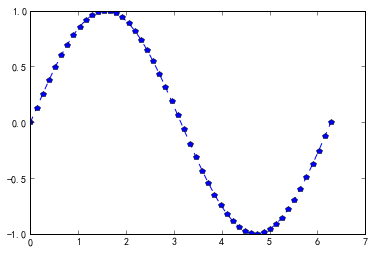

In [4]:
import numpy as np
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y, 'bp--')
plt.show()

###（2）pie

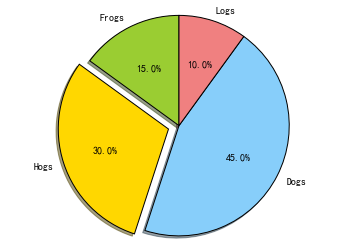

In [9]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs'] #定义标签
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] #每一块的颜色
explode = (0, 0.1, 0, 0)#突出显示，这里仅突出显示第二块

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') #显示为圆，避免比例压缩为椭圆
plt.show()

###（3）hist

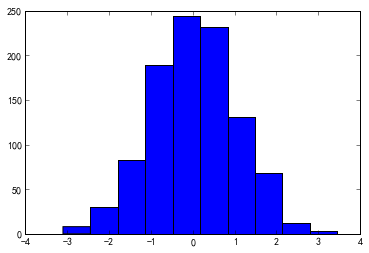

In [15]:
import numpy as np
x = np.random.randn(1000)#1000个服从正态分布的随机数
plt.hist(x, 10)#分成10组绘制直方图
plt.show()

###（4）boxplot

使用格式：  
D.boxplot()/D.plot(kind='box')

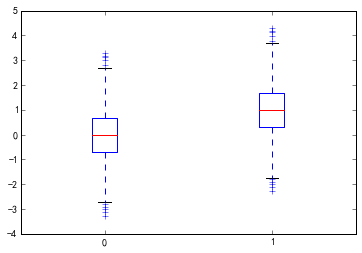

In [16]:
import numpy as np
import pandas as pd
x = np.random.randn(1000)
D = pd.DataFrame([x, x+1]).T #构建两列的DataFrame
D.plot(kind='box')
plt.show()

###（5）plot(logx=True)/plot(logy=True)

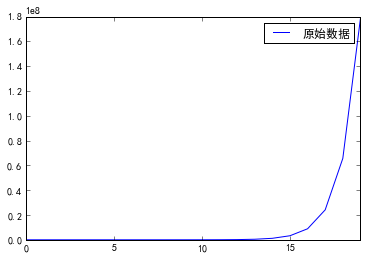

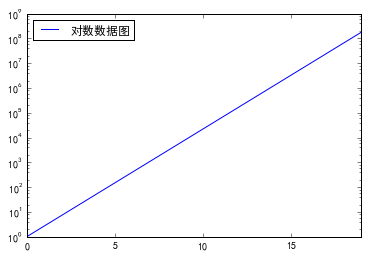

In [29]:
import numpy as np
import pandas as pd

x = pd.Series(np.exp(np.arange(20)))
plt.figure(1)
x.plot(label=u'原始数据', legend=True)
plt.show

plt.figure(2)
x.plot(logy=True, label=u'对数数据图', legend=True)
plt.show()

###（6）plot(yerr=error)

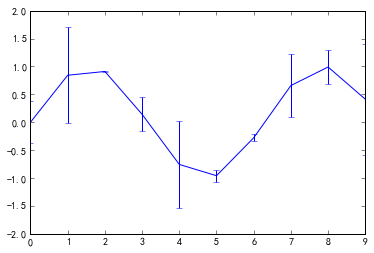

In [30]:
import numpy as np
import pandas as pd

error = np.random.randn(10)#定义误差列
y = pd.Series(np.sin(np.arange(10))) #均值数据列
y.plot(yerr=error)#绘制误差图
plt.show()